# Efficient Word Representation

This notebook is to demonstrate the capabilities of word2vec representation.

In [1]:
import gensim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

## Load pretrained Word2Vec
Several different pretrained word2vec models exist. Here we load a model that was trained on roughly 1 billion words resulting in a vocabulary of 3 million word vectors of length 300, each.

In [2]:
%%time
model = gensim.models.KeyedVectors.load_word2vec_format('../Data/w2v.bin.gz', binary=True)

CPU times: user 2min 10s, sys: 2.43 s, total: 2min 12s
Wall time: 2min 12s


## Explore Word2Vec
First, check the vocabulary and the word vector lengths.

In [3]:
print("Number of words in vocabulary: {}, each with length of {} ".format(len(model.vocab), model.vector_size))

Number of words in vocabulary: 3000000, each with length of 300 


In [4]:
model['fox'][1:10]

array([-0.01379395, -0.3125    , -0.04125977,  0.05493164, -0.12988281,
       -0.10107422, -0.00164795,  0.15917969,  0.12402344], dtype=float32)

In [5]:
model.most_similar('fox')

[('foxes', 0.7762556076049805),
 ('squirrel', 0.6794781684875488),
 ('rabbit', 0.6482737064361572),
 ('squirrels', 0.6386120915412903),
 ('coyote', 0.6145133972167969),
 ('owl', 0.6064995527267456),
 ('proverbial_fox_guarding', 0.6052221655845642),
 ('gray_fox', 0.5987539291381836),
 ('critter', 0.5982018709182739),
 ('raccoon', 0.5971077680587769)]

In [6]:
model.most_similar('jaguar')

[('jaguars', 0.6738405227661133),
 ('Macho_B', 0.6313096284866333),
 ('panther', 0.6086338758468628),
 ('lynx', 0.581459641456604),
 ('rhino', 0.5754255056381226),
 ('lizard', 0.560685396194458),
 ('tapir', 0.5563079118728638),
 ('tiger', 0.5528684854507446),
 ('leopard', 0.5472891330718994),
 ('Florida_panther', 0.5464144945144653)]

In [7]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

# Explore Word2Vec with countries and the capitals

Load table with European countries and their capitals to illustrate their similarity.

In [8]:
df = pd.read_csv("../Data/countries.csv")
df

,country,capital
0,Albania,Tirana
1,Armenia,Yerevan
2,Austria,Vienna
3,Azerbaijan,Baku
4,Belarus,Minsk
5,Belgium,Brussels
6,Bulgaria,Sofia
7,Croatia,Zagreb
8,Cyprus,Nicosia
9,Czechia,Prague


Prepare table for further analysis and get word vectors.

In [9]:
dfm = df.melt()
words = list(dfm['value'])
X = model[words]
X.shape

(84, 300)

Use TSNE for dimension reduction to only 2 dimension to be able to plot the data.

In [10]:
tsne = TSNE(n_components=2, random_state=2)
X_tsne = tsne.fit_transform(X)

df_transformed = pd.DataFrame(X_tsne, index=words, columns=['x', 'y'])
df_transformed['type'] = list(dfm['variable'])

df_transformed

,x,y,type
Albania,2.752351,23.458961,country
Armenia,3.266912,1.723994,country
Austria,32.278797,23.028397,country
Azerbaijan,5.106842,-4.388043,country
Belarus,11.843340,0.173089,country
...,...,...,...
Madrid,-33.143990,-4.177378,capital
Stockholm,48.910679,-9.266766,capital
Bern,-41.820072,-19.356211,capital
Ankara,-6.191529,1.554370,capital


Finally plot all countries and their respective capitals. From the plot it can be seen that most of the blue points are grouped together and most of the orange points are grouped together. This is the result of the semantic similarity represented in word2vec.

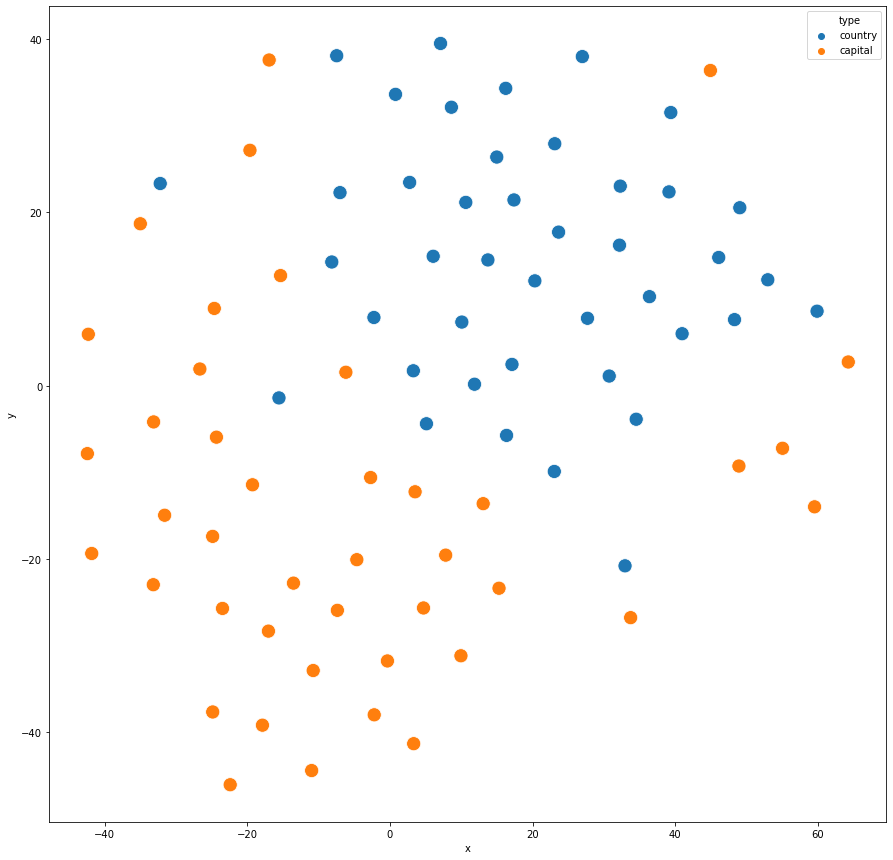

In [11]:
import seaborn as sns

plt.figure(figsize=(15, 15))
ax = sns.scatterplot(data=df_transformed, x="x", y="y", hue="type", s=200)